In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
atlyginimai = pd.read_csv('ds_salaries.csv')
atlyginimai

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [6]:
atlyginimai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


#Kurioje specialybėje didžiausias vidutinis atlyginimas 'Entry level' darbuotojams? (full time) (Top 5)

In [3]:
entry_level = atlyginimai.loc[(atlyginimai['experience_level'] == 'EN') & (atlyginimai['employment_type'] == 'FT')]
entry_level

vid_atl_entry_level = entry_level.groupby('job_title')['salary_in_usd'].agg(Mean='mean').round(2)
vid_atl_entry_level

vid_atl_entry_level_top5_ft = vid_atl_entry_level.sort_values(by='Mean', ascending=False).head(5)
vid_atl_entry_level_top5_ft

,Mean
job_title,
Machine Learning Scientist,225000.0
Applied Data Scientist,110037.0
Computer Vision Software Engineer,110000.0
Machine Learning Developer,100000.0
Financial Data Analyst,100000.0


#Kurioje specialybėje mažiausias atlyginimas 'Entry level' darbuotojams? (full time)

In [4]:
vid_atl_entry_level.sort_values(by='Mean', ascending=True).head(1)

,Mean
job_title,
Data Analytics Engineer,20000.0


#Kurioje specialybėje didžiausias vidutinis atlyginimas 'Mid level' darbuotojams? (full time) (Top 5)

In [7]:
mid_level = atlyginimai.loc[(atlyginimai['experience_level'] == 'MI') & (atlyginimai['employment_type'] == 'FT')]
mid_level

vid_atl_mid_level = mid_level.groupby('job_title')['salary_in_usd'].agg(Mean='mean').round(2)
vid_atl_mid_level

vid_atl_mid_level.sort_values(by='Mean', ascending=False).head(5)

,Mean
job_title,
Financial Data Analyst,450000.00
Data Science Manager,200000.00
Applied Machine Learning Scientist,178800.00
Data Architect,166666.67
AI Scientist,160000.00


#Kurioje specialybėje mažiausias vidutinis atlyginimas 'Mid level' darbuotojams? (full time)

In [8]:
vid_atl_mid_level.sort_values(by='Mean', ascending=True).head(1)

,Mean
job_title,
Product Data Analyst,13036.0


#Kurioje specialybėje didžiausias vidutinis atlyginimas 'Senior level' darbuotojams? (full time) (Top 5)

In [9]:
senior_level = atlyginimai.loc[(atlyginimai['experience_level'] == 'SE') & (atlyginimai['employment_type'] == 'FT')]
senior_level

vid_atl_senior_level = senior_level.groupby('job_title')['salary_in_usd'].agg(Mean='mean').round(2)
vid_atl_senior_level

vid_atl_senior_level.sort_values(by='Mean', ascending=False).head(5)

,Mean
job_title,
Data Analytics Lead,405000.00
Applied Data Scientist,278500.00
ML Engineer,256000.00
Machine Learning Scientist,201666.67
Analytics Engineer,195000.00


#Kurioje specialybėje mažiausias vidutinis atlyginimas 'Senior level' darbuotojams? (full time)

In [10]:
vid_atl_senior_level.sort_values(by='Mean', ascending=True).head(1)

,Mean
job_title,
Computer Vision Engineer,21453.5


#Koreliacija tarp įmonės dydžio, patirties ir atlyginimų rėžių (pvz.: Data Scientist)

In [11]:
data_sc = atlyginimai[['job_title', 'salary_in_usd', 'experience_level', 'company_size', 'employment_type']]
data_sc

data_scientist = data_sc[(data_sc['job_title'] == 'Data Scientist') & (data_sc['employment_type'] == 'FT')]
data_scientist.sort_values(by='salary_in_usd', ascending=False)



,job_title,salary_in_usd,experience_level,company_size,employment_type
63,Data Scientist,412000,SE,L,FT
416,Data Scientist,260000,SE,M,FT
592,Data Scientist,230000,SE,M,FT
486,Data Scientist,230000,SE,M,FT
472,Data Scientist,220000,SE,M,FT
...,...,...,...,...,...
205,Data Scientist,12901,MI,S,FT
127,Data Scientist,9466,MI,S,FT
179,Data Scientist,5679,MI,S,FT
238,Data Scientist,4000,EN,M,FT


# Duomenų mokslininko vidutinis metinis atlyginimas pagal patirtį (full time)

<ipython-input-12-99aaf2d9b8aa>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avgs_by_experience = dict(data_scientist.groupby('experience_level').mean()['salary_in_usd'])


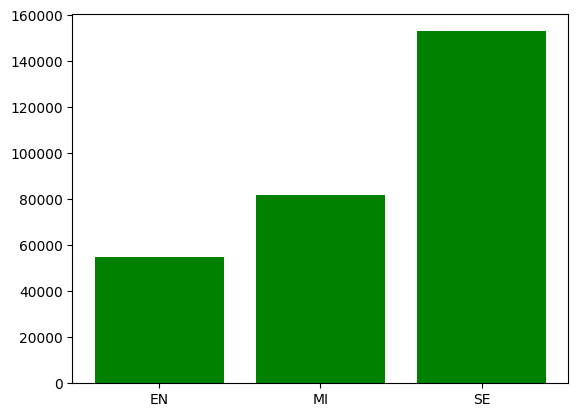

In [12]:
# data_scientist[['experience_level', 'salary_in_usd']].sort_values(by='salary_in_usd')
avgs_by_experience = dict(data_scientist.groupby('experience_level').mean()['salary_in_usd'])

experience_levels = list(avgs_by_experience.keys())
experience_values = list(avgs_by_experience.values())

plt.bar(experience_levels, experience_values, color='green')
plt.show()

# Duomenų mokslininko vidutinio metinio atlyginimo ir įmonės dydžio koreliacija (full time)

<ipython-input-13-adb369647436>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avgs_by_company_size = dict(data_scientist.groupby('company_size').mean()['salary_in_usd'])


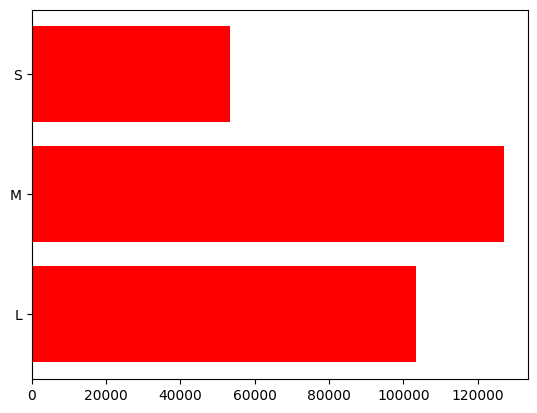

In [13]:
avgs_by_company_size = dict(data_scientist.groupby('company_size').mean()['salary_in_usd'])

company_size_levels = list(avgs_by_company_size.keys())
company_size_values = list(avgs_by_company_size.values())

plt.barh(company_size_levels, company_size_values, color = 'red')
plt.show()

# Nuotolinio darbo ir atlyginimo koreliacija (pvz.: Duomenų mokslininko) (full time)

In [14]:
data_sc_remote = atlyginimai[['job_title', 'salary_in_usd', 'remote_ratio', 'employment_type']]
data_sc_remote

data_scientist_remote = data_sc_remote[(data_sc_remote['job_title'] == 'Data Scientist') & (data_sc_remote['employment_type'] == 'FT')]
data_scientist_remote.sort_values(by='salary_in_usd', ascending=False)

,job_title,salary_in_usd,remote_ratio,employment_type
63,Data Scientist,412000,100,FT
416,Data Scientist,260000,100,FT
592,Data Scientist,230000,100,FT
486,Data Scientist,230000,100,FT
472,Data Scientist,220000,100,FT
...,...,...,...,...
205,Data Scientist,12901,0,FT
127,Data Scientist,9466,0,FT
179,Data Scientist,5679,100,FT
238,Data Scientist,4000,0,FT


<ipython-input-15-ad7b87d1ebaa>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avgs_by_remote_ratio = dict(data_scientist_remote.groupby('remote_ratio').mean()['salary_in_usd'])


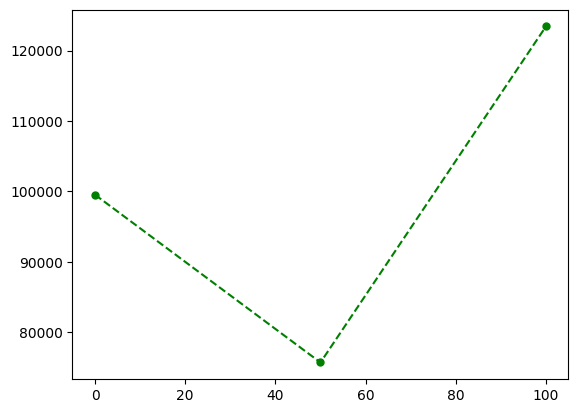

In [15]:
avgs_by_remote_ratio = dict(data_scientist_remote.groupby('remote_ratio').mean()['salary_in_usd'])

remote_ratio_levels = list(avgs_by_remote_ratio.keys())
remote_ratio_values = list(avgs_by_remote_ratio.values())

plt.plot(remote_ratio_levels, remote_ratio_values, color='green', marker='.', linestyle='--', markersize=10)
plt.show()

# Metinių atlyginimų rėžiai (Data Scientist, EN level, full time)

In [16]:
data_scientist_en = data_scientist[data_scientist['experience_level'] == 'EN']
data_scientist_en

#data scientist atlyginimo reziai entry level

atl_data_scientist_en = list(data_scientist_en['salary_in_usd'])
print(atl_data_scientist_en)
maziau_uz_50k = 0
maziau_uz_100k = 0
daugiau_uz_100k = 0

for atl in atl_data_scientist_en:
    if atl < 50000:
        maziau_uz_50k = maziau_uz_50k + 1
    elif atl < 100000:
        maziau_uz_100k = maziau_uz_100k + 1
    elif atl >= 100000:
        daugiau_uz_100k = daugiau_uz_100k +1

print('Iš viso duomenų: ', len(data_scientist_en))
print()
print('Uždirba mažiau nei 50k per metus: ', maziau_uz_50k)
print('Uždirba mažiau nei 100k: ', maziau_uz_100k)
print('Uždirba daugiau nei 100k: ', daugiau_uz_100k)

[51321, 39916, 62726, 49268, 105000, 29751, 49646, 100000, 80000, 13400, 4000, 36643, 90000, 28399, 100000, 58000, 18442, 52396, 40000, 86703]
Iš viso duomenų:  20

Uždirba mažiau nei 50k per metus:  10
Uždirba mažiau nei 100k:  7
Uždirba daugiau nei 100k:  3


In [36]:
min_atl_data_scientist_en = min(atl_data_scientist_en)
print('Mažiausias atlyginimas EN lygio: ', min_atl_data_scientist_en)
max_atl_data_scientist_en = max(atl_data_scientist_en)
print('Didžiausias atlyginimas EN lygio: ', max_atl_data_scientist_en)

Mažiausias atlyginimas EN lygio:  4000
Didžiausias atlyginimas EN lygio:  105000


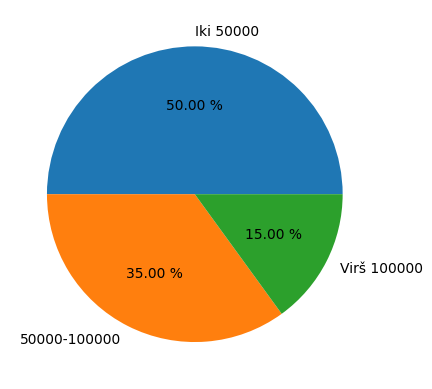

In [17]:

atlyginimu_reziai_en = [maziau_uz_50k, maziau_uz_100k, daugiau_uz_100k]
atlyginimu_labeliai_en = ['Iki 50000', '50000-100000', 'Virš 100000']

plt.pie(atlyginimu_reziai_en, labels = atlyginimu_labeliai_en, autopct='%.2f %%')
plt.show()

# Metinių atlyginimų rėžiai (Data Scientist, MID level, full time)

In [18]:
data_scientist_mid = data_scientist[data_scientist['experience_level'] == 'MI']
data_scientist_mid

#data scientist atlyginimo reziai mid level

atl_data_scientist_mid = list(data_scientist_mid['salary_in_usd'])
print(atl_data_scientist_mid)
maziau_uz_50k_mid = 0
maziau_uz_100k_mid = 0
maziau_uz_200k_mid = 0
daugiau_uz_200k_mid = 0

for atl in atl_data_scientist_mid:
    if atl < 50000:
        maziau_uz_50k_mid = maziau_uz_50k_mid + 1
    elif atl < 100000:
        maziau_uz_100k_mid = maziau_uz_100k_mid + 1
    elif atl < 200000:
        maziau_uz_200k_mid = maziau_uz_200k_mid +1
    elif atl >= 20000:
        daugiau_uz_200k_mid = daugiau_uz_200k_mid +1

print('Iš viso duomenų: ', len(data_scientist_mid))
print()
print('Uždirba mažiau nei 50k per metus: ', maziau_uz_50k_mid)
print('Uždirba mažiau nei 100k: ', maziau_uz_100k_mid)
print('Uždirba mažiau nei 200k: ', maziau_uz_200k_mid)
print('Uždirba daugiau nei 200k: ', daugiau_uz_200k_mid)

[79833, 35735, 40481, 45760, 76958, 105000, 38776, 118000, 138350, 62726, 42197, 73000, 50000, 9466, 82500, 150000, 75774, 119059, 2859, 40038, 5679, 90734, 147000, 61467, 37825, 160000, 12901, 90734, 116914, 33808, 56256, 88654, 46809, 115000, 130000, 16904, 25532, 109000, 130000, 90000, 65438, 39263, 71982, 45807, 31615, 183228, 91614, 200000, 120000, 35590, 48000, 122346, 69336, 135000, 78000, 141300, 102100, 160000, 130000]
Iš viso duomenų:  59

Uždirba mažiau nei 50k per metus:  20
Uždirba mažiau nei 100k:  18
Uždirba mažiau nei 200k:  20
Uždirba daugiau nei 200k:  1


In [37]:
min_atl_data_scientist_mid = min(atl_data_scientist_mid)
print('Mažiausias atlyginimas MID lygio: ', min_atl_data_scientist_mid)
max_atl_data_scientist_mid = max(atl_data_scientist_mid)
print('Didžiausias atlyginimas MID lygio: ', max_atl_data_scientist_mid)

Mažiausias atlyginimas MID lygio:  2859
Didžiausias atlyginimas MID lygio:  200000


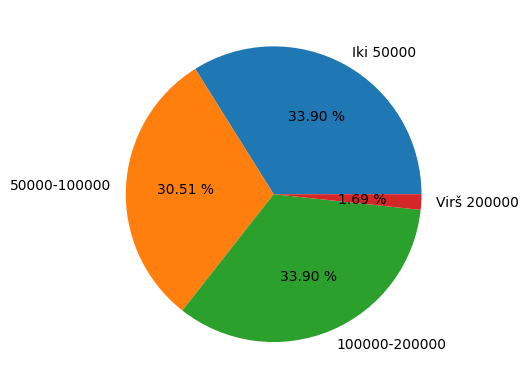

In [19]:
atlyginimu_reziai_mid = [maziau_uz_50k_mid, maziau_uz_100k_mid, maziau_uz_200k_mid, daugiau_uz_200k_mid]
atlyginimu_labeliai_mid = ['Iki 50000', '50000-100000', '100000-200000', 'Virš 200000']

plt.pie(atlyginimu_reziai_mid, labels = atlyginimu_labeliai_mid, autopct='%.2f %%')
plt.show()

# Metinių atlyginimų rėžiai (Data Scientist, SE level, full time)

In [20]:
data_scientist_se = data_scientist[data_scientist['experience_level'] == 'SE']
data_scientist_se

#data scientist atlyginimo reziai se level

atl_data_scientist_se = list(data_scientist_se['salary_in_usd'])
print(atl_data_scientist_se)
maziau_uz_50k_se = 0
maziau_uz_100k_se = 0
maziau_uz_200k_se = 0
daugiau_uz_200k_se = 0

for atl in atl_data_scientist_se:
    if atl < 50000:
        maziau_uz_50k_se = maziau_uz_50k_se + 1
    elif atl < 100000:
        maziau_uz_100k_se = maziau_uz_100k_se + 1
    elif atl < 200000:
        maziau_uz_200k_se = maziau_uz_200k_se +1
    elif atl >= 20000:
        daugiau_uz_200k_se = daugiau_uz_200k_se +1

print('Iš viso duomenų: ', len(data_scientist_se))
print()
print('Uždirba mažiau nei 50k per metus: ', maziau_uz_50k_se)
print('Uždirba mažiau nei 100k: ', maziau_uz_100k_se)
print('Uždirba mažiau nei 200k: ', maziau_uz_200k_se)
print('Uždirba daugiau nei 200k: ', daugiau_uz_200k_se)

[68428, 120000, 412000, 91237, 53192, 87738, 135000, 103691, 165000, 77684, 20171, 136620, 99360, 117789, 104702, 146000, 123000, 165220, 120160, 180000, 120000, 95550, 167000, 123000, 150000, 211500, 138600, 170000, 123000, 215300, 158200, 180000, 260000, 180000, 80000, 140400, 215300, 104890, 140000, 220000, 140000, 185100, 230000, 100000, 165000, 205300, 140400, 176000, 144000, 205300, 140400, 140000, 210000, 140000, 210000, 140000, 210000, 140000, 230000, 150000, 210000]
Iš viso duomenų:  61

Uždirba mažiau nei 50k per metus:  1
Uždirba mažiau nei 100k:  8
Uždirba mažiau nei 200k:  38
Uždirba daugiau nei 200k:  14


In [38]:
min_atl_data_scientist_se = min(atl_data_scientist_se)
print('Mažiausias atlyginimas SE lygio: ', min_atl_data_scientist_se)
max_atl_data_scientist_se = max(atl_data_scientist_se)
print('Didžiausias atlyginimas SE lygio: ', max_atl_data_scientist_se)

Mažiausias atlyginimas SE lygio:  20171
Didžiausias atlyginimas SE lygio:  412000


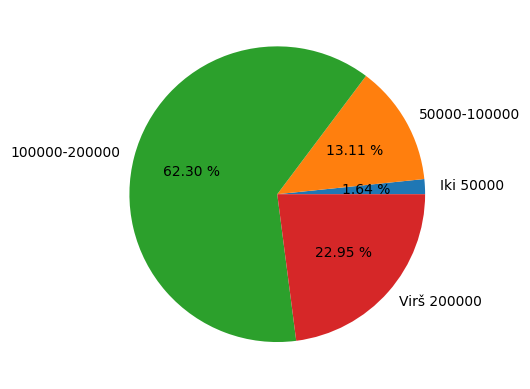

In [21]:
atlyginimu_reziai_se = [maziau_uz_50k_se, maziau_uz_100k_se, maziau_uz_200k_se, daugiau_uz_200k_se]
atlyginimu_labeliai_se = ['Iki 50000', '50000-100000', '100000-200000', 'Virš 200000']

plt.pie(atlyginimu_reziai_se, labels = atlyginimu_labeliai_se, autopct='%.2f %%')
plt.show()

# Kokie skirtumai tarp vidutinio metinio atlyginimo tarp EN, MID ir SE patirties? (Data Scientist, full time)

In [33]:
atl_data_scientist_en = list(data_scientist_en['salary_in_usd'])
#print(atl_data_scientist_en)

vid_atl_en = sum(atl_data_scientist_en) / len(atl_data_scientist_en)
print('Vidutinis atlyginimas EN lygio patirties: ', vid_atl_en)

vid_atl_mid = round(sum(atl_data_scientist_mid) / len(atl_data_scientist_mid), 2)
print('Vidutinis atlyginimas MID lygio patirties: ', vid_atl_mid)

vid_atl_se = round(sum(atl_data_scientist_se) / len(atl_data_scientist_se), 2)
print('Vidutinis atlyginimas SE lygio patirties: ', vid_atl_se)
print()
#kiek kartų skiriasi atlyginimai

mid_nuo_en = round(vid_atl_en / vid_atl_mid, 2)
print(f'Vidutinis MID atlyginimas yra didesnis už EN {mid_nuo_en} karto')
se_nuo_mid = round(vid_atl_se / vid_atl_mid, 2)
print(f'Vidutinis SE atlyginimas yra didesnis už MID {se_nuo_mid} karto')
se_nuo_en = round(vid_atl_se / vid_atl_en, 2)
print(f'Vidutinis SE atlyginimas yra didesnis už EN {se_nuo_en} karto')

Vidutinis atlyginimas EN lygio patirties:  54780.55
Vidutinis atlyginimas MID lygio patirties:  81734.71
Vidutinis atlyginimas SE lygio patirties:  152971.02

Vidutinis MID atlyginimas yra didesnis už EN 0.67 karto
Vidutinis SE atlyginimas yra didesnis už MID 1.87 karto
Vidutinis SE atlyginimas yra didesnis už EN 2.79 karto
